# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Read the Dataset

In [2]:
df = pd.read_csv('train.csv')

# Dataset Overview

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

# EDA

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Features Correlation Heatmap')

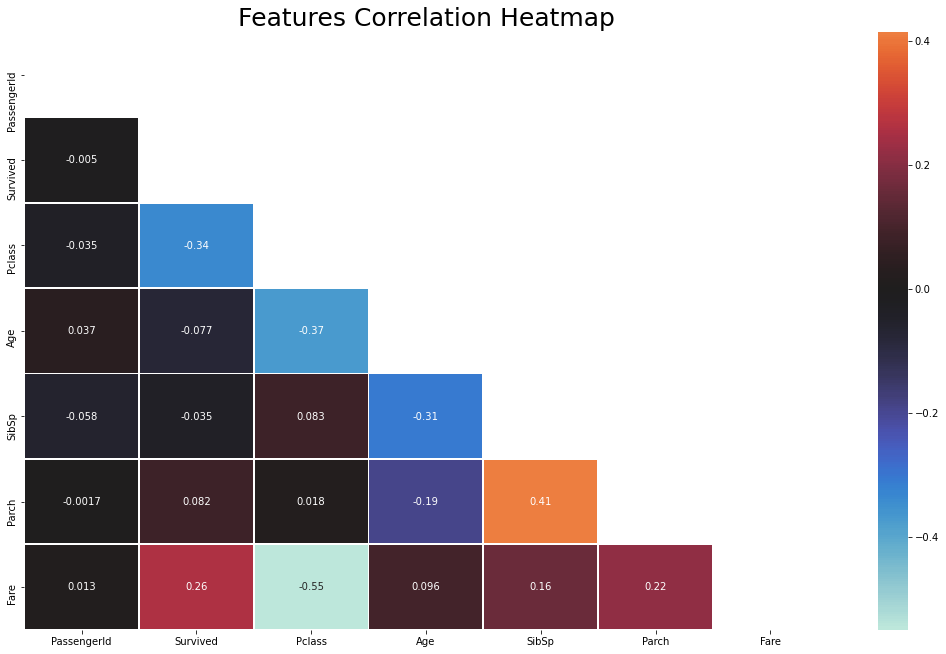

In [7]:
plt.figure(figsize=(18, 11))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(),center= 0, annot=True, linewidth=0.8, mask=matrix)

plt.title('Features Correlation Heatmap', fontsize = 25)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

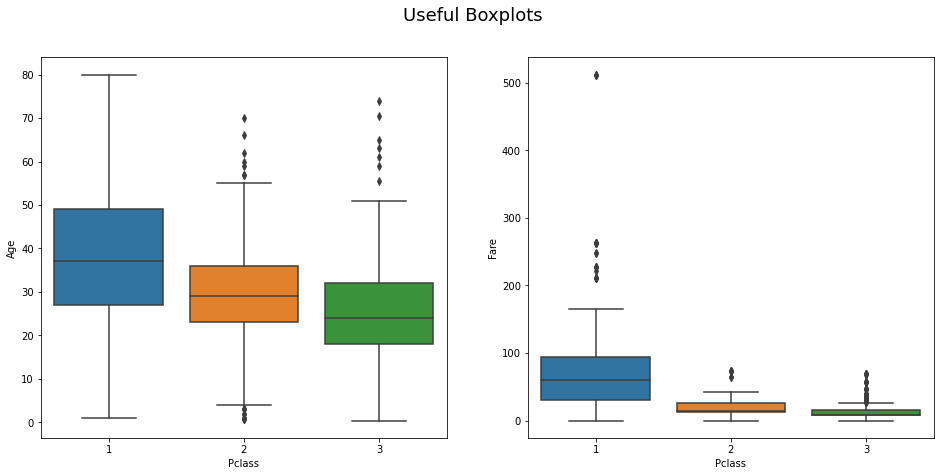

In [8]:
fig, axes = plt.subplots(1,2, figsize = (16,7))
fig.suptitle('Useful Boxplots', fontsize = 18)

sns.boxplot(data = df, x = 'Pclass', y = 'Age', ax = axes[0])
sns.boxplot(data = df, x = 'Pclass', y = 'Fare', ax = axes[1])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

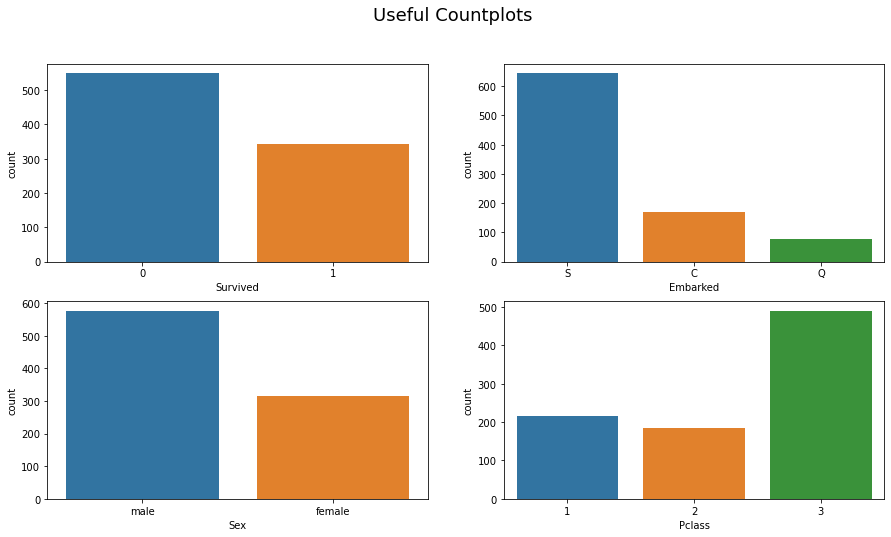

In [9]:
fig, axes = plt.subplots(2,2, figsize = (15,8))
fig.suptitle('Useful Countplots', fontsize = 18)

sns.countplot(data = df, x = 'Survived', ax = axes[0,0])
sns.countplot(data = df, x = 'Embarked', ax = axes[0,1])
sns.countplot(data = df, x = 'Sex', ax = axes[1,0])
sns.countplot(data = df, x = 'Pclass', ax = axes[1,1])

<AxesSubplot:xlabel='Age', ylabel='Count'>

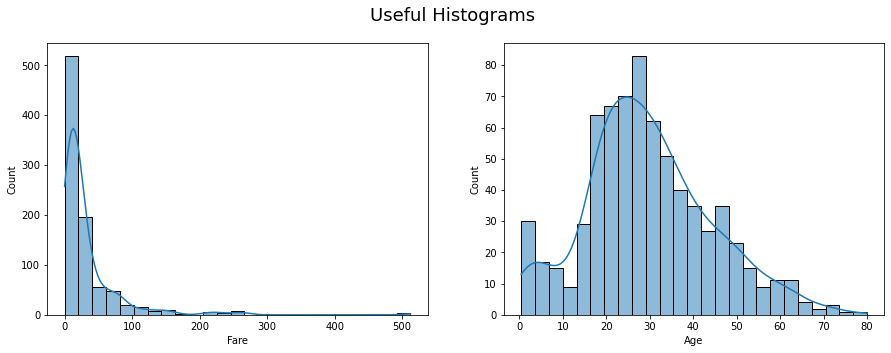

In [10]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Useful Histograms', fontsize = 18)

sns.histplot(data = df, x = 'Fare', kde= True, bins = 25, ax = axes[0])
sns.histplot(data = df, x = 'Age', kde= True, bins = 25, ax = axes[1])

# Data Cleaning

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
unnecassary_features = ['PassengerId', 'Name', 'Ticket', 'Cabin'] 
# cabin number seems to be important, but lots of its data is missing so it's better to be droped 

In [14]:
df.drop(unnecassary_features, axis = 1, inplace=True)

### Feature adjustment

In [15]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} )

In [16]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [17]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,22.0,7.2500,S,1
1,1,1,0,38.0,71.2833,C,1
2,1,3,0,26.0,7.9250,S,0
3,1,1,0,35.0,53.1000,S,1
4,0,3,1,35.0,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,S,0
887,1,1,0,19.0,30.0000,S,0
888,0,3,0,NaN,23.4500,S,3
889,1,1,1,26.0,30.0000,C,0


# missing data

In [18]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        2
FamilySize      0
dtype: int64

**Embarked** and **Age** has missing data and in this part we are going to deal with them:

# 1) Embarked

In [19]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
61,1,1,0,38.0,80.0,NaN,0
829,1,1,0,62.0,80.0,NaN,0


In [20]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

It seems our null data on "Embarked" feature, are two independant **rich** ( because of their high "Fare" ) **women**...

Most of the rich people embarked on the trip from **cherbourg harbour** (C); so it's very likely that they embarked from cherbourg too...

To better understand this geuss, let's look at some charts:

Text(0.5, 1.05, 'Passengers Class on Queenstown harbour')

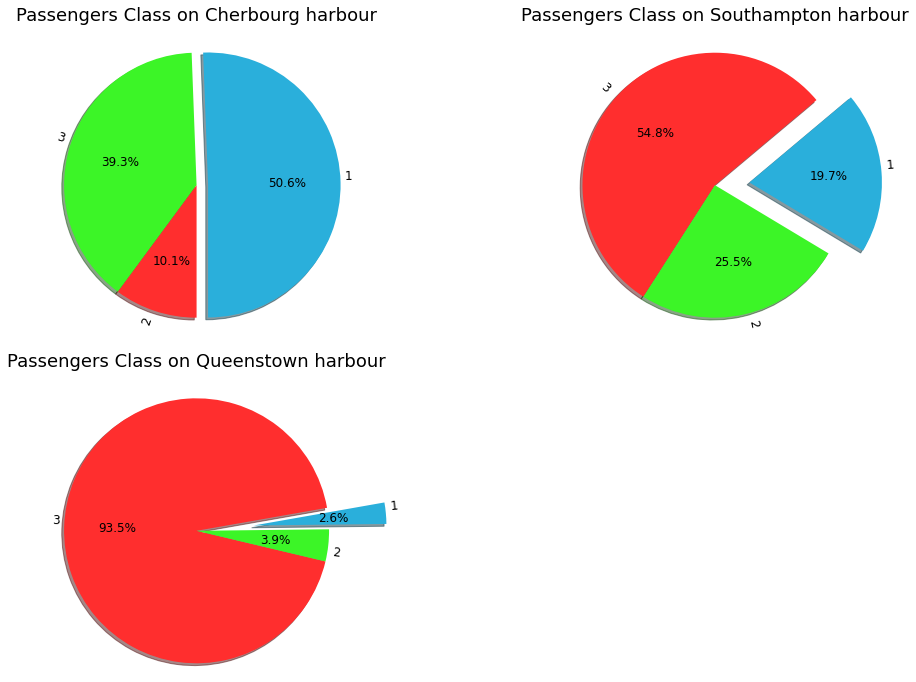

In [21]:
dfs = df[df['Embarked'] == 'S']
dfc = df[df['Embarked'] == 'C']
dfq = df[df['Embarked'] == 'Q']

fig = plt.figure()

ax2 = fig.add_axes([1.2,0,1,1])
ax2.pie(dfs['Pclass'].value_counts(),explode = (0,0,0.3), labels = dfs['Pclass'].value_counts().keys(),
        labeldistance = 1.03, shadow = True, autopct = '%1.1f%%', 
        startangle = 40, radius = 1.15, rotatelabels = True,
        textprops = {'fontsize': 12}, colors = [ '#ff2e2e', '#3cf527','#2aafdb'])

ax2.set_title('Passengers Class on Southampton harbour', y = 1.05, fontsize = 18)

ax1 = fig.add_axes([0,0,1,1])
ax1.pie(dfc['Pclass'].value_counts(),explode = (0.1,0,0), labels = dfc['Pclass'].value_counts().keys(),
        labeldistance = 1.03, shadow = True, autopct = '%1.1f%%', 
        startangle = -90, radius = 1.15, rotatelabels = True,
        textprops = {'fontsize': 12}, colors = ['#2aafdb','#3cf527', '#ff2e2e'])

ax1.set_title('Passengers Class on Cherbourg harbour', y = 1.05, fontsize = 18)

ax3 = fig.add_axes([0,-1.2,1,1])
ax3.pie(dfq['Pclass'].value_counts(),explode = (0,0,0.5), labels = dfq['Pclass'].value_counts().keys(),
        labeldistance = 1.03, shadow = True, autopct = '%1.1f%%', 
        startangle = 10, radius = 1.15, rotatelabels = True,
        textprops = {'fontsize': 12}, colors = [ '#ff2e2e', '#3cf527','#2aafdb'])

ax3.set_title('Passengers Class on Queenstown harbour', y = 1.05, fontsize = 18)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

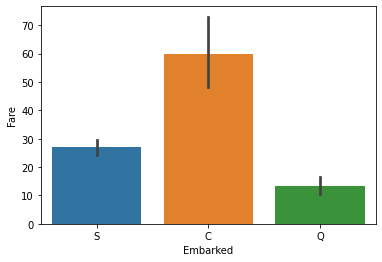

In [22]:
sns.barplot(y = df['Fare'], x = df['Embarked'])

In [23]:
df = df.fillna({'Embarked': 'C'})

# 2) Age

In [24]:
df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
Embarked        0
FamilySize      0
dtype: int64

In [25]:
df.corr()

,Survived,Pclass,Sex,Age,Fare,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.077221,0.257307,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.369226,-0.549500,0.065997
Sex,-0.543351,0.131900,1.000000,0.093254,-0.182333,-0.200988
Age,-0.077221,-0.369226,0.093254,1.000000,0.096067,-0.301914
Fare,0.257307,-0.549500,-0.182333,0.096067,1.000000,0.217138
FamilySize,0.016639,0.065997,-0.200988,-0.301914,0.217138,1.000000


As you can see, **Age** is highly correlated with **Pclass**. So it's better to guess the **Age** of passengers according to their **Pclass**...

In this section we use the **median** to keep the age distribution in each class unchanged. 

In [26]:
for i in range(1, 4):
    
        df.loc[(df.Age.isnull()) & (df.Pclass == i), 'Age'] = df[(df['Pclass'] == i)]['Age'].median()

In [27]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
FamilySize    0
dtype: int64

# Categorical Data (Embarked)

In [28]:
df1 = pd.get_dummies(df['Embarked'], drop_first=True)

In [29]:
final_df = pd.concat([df.drop('Embarked', axis = 1),df1], axis=1)

In [30]:
final_df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Q,S
0,0,3,1,22.0,7.2500,1,0,1
1,1,1,0,38.0,71.2833,1,0,0
2,1,3,0,26.0,7.9250,0,0,1
3,1,1,0,35.0,53.1000,1,0,1
4,0,3,1,35.0,8.0500,0,0,1


Ready to build some models

# Model Building

# Split the Dataset to Train and Test

In [31]:
X = final_df.drop('Survived', axis = 1)
y = final_df['Survived']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# 1) Logistic Regression

In [33]:
# libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Pipeline

In [34]:
logistic_pipe = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression())])

In [35]:
logistic_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [36]:
logistic_pipe['logistic'].coef_

array([[-0.97482405, -1.31031291, -0.51971968,  0.06927554, -0.33325478,
        -0.06958959, -0.13913492]])

### Predict

In [37]:
y_log_pred = logistic_pipe.predict(X_test)

### Evaluation

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [39]:
accuracy_score(y_test, y_log_pred)

0.8

In [40]:
confusion_matrix(y_test, y_log_pred)

array([[46,  5],
       [13, 26]], dtype=int64)

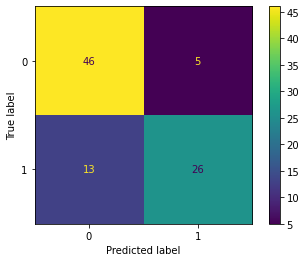

In [41]:
plot_confusion_matrix(logistic_pipe, X_test, y_test)

In [42]:
print(classification_report(y_test, y_log_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        51
           1       0.84      0.67      0.74        39

    accuracy                           0.80        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.81      0.80      0.80        90



### Evaluation Curves

In [43]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

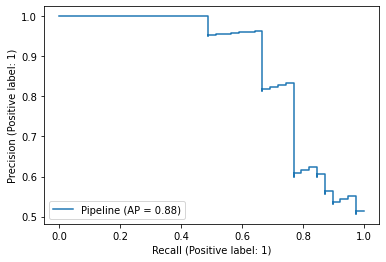

In [44]:
plot_precision_recall_curve(logistic_pipe, X_test, y_test)

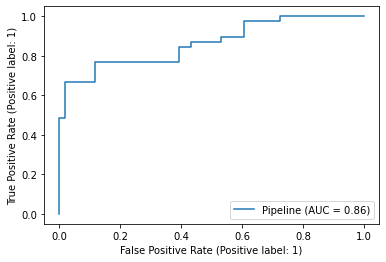

In [45]:
plot_roc_curve(logistic_pipe, X_test, y_test)

# 2) KNN

In [46]:
# libraries
from sklearn.neighbors import KNeighborsClassifier

### Pipeline

In [47]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 1))])

In [48]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

### Predict

In [49]:
y_knn_pred = knn_pipe.predict(X_test)

### Evaluation

In [50]:
accuracy_score(y_test, y_knn_pred)

0.7777777777777778

### Finding the Best K

In [51]:
error_rate = []
for i in range(1,31):
    knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = i))])
    
    knn_pipe.fit(X_train, y_train)
    y_knn_pred = knn_pipe.predict(X_test)
    
    error = 1 - accuracy_score(y_test, y_knn_pred)
    error_rate.append(error)

Text(0, 0.5, 'Error Rate')

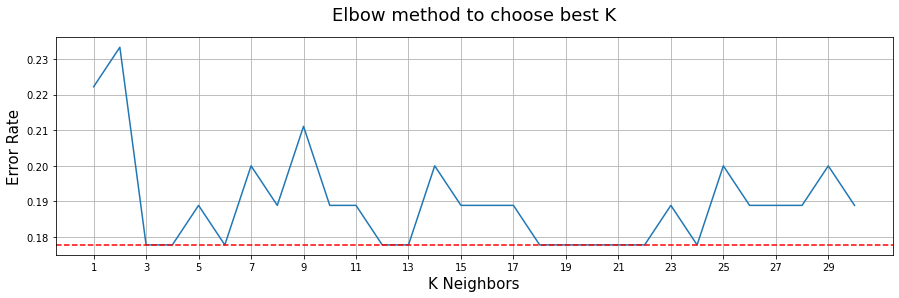

In [53]:
plt.figure(figsize=(15,4))

plt.plot(range(1,31), error_rate)
plt.axhline(min(error_rate), c = 'r', ls = '--')
plt.grid()

plt.title('Elbow method to choose best K', fontsize=18, y = 1.05)
plt.xticks(range(1,31,2))
plt.xlabel('K Neighbors', fontsize=15)
plt.ylabel('Error Rate', fontsize=15)

Best **K** is number 4 (or 6,12,18 ... but for choose 4 for less complexity and same error rate)

### Prediction and Evaluation using best **K**

In [54]:
final_knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 3))])

final_knn_pipe.fit(X_train, y_train)

final_y_knn_pred = final_knn_pipe.predict(X_test)

In [55]:
accuracy_score(y_test, final_y_knn_pred)

0.8222222222222222

In [56]:
confusion_matrix(y_test, final_y_knn_pred)

array([[46,  5],
       [11, 28]], dtype=int64)

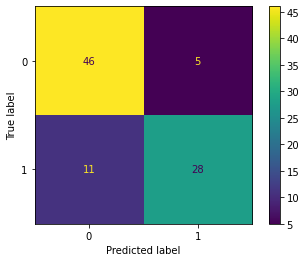

In [57]:
plot_confusion_matrix(final_knn_pipe, X_test, y_test)

In [58]:
print(classification_report(y_test, final_y_knn_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        51
           1       0.85      0.72      0.78        39

    accuracy                           0.82        90
   macro avg       0.83      0.81      0.81        90
weighted avg       0.82      0.82      0.82        90



### Evaluation Curves

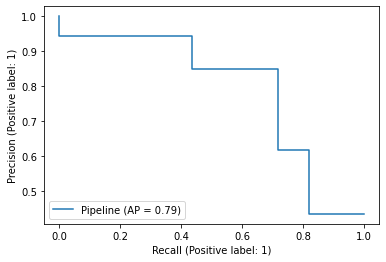

In [59]:
plot_precision_recall_curve(final_knn_pipe, X_test, y_test)

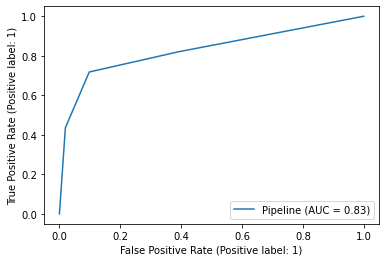

In [60]:
plot_roc_curve(final_knn_pipe, X_test, y_test)

# Conclusion

In [61]:
print('**KNN Model**\n', classification_report(y_test, final_y_knn_pred))
print('\n**Logistic Regression Model**\n\n', classification_report(y_test, y_log_pred))

**KNN Model**
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        51
           1       0.85      0.72      0.78        39

    accuracy                           0.82        90
   macro avg       0.83      0.81      0.81        90
weighted avg       0.82      0.82      0.82        90


**Logistic Regression Model**

               precision    recall  f1-score   support

           0       0.78      0.90      0.84        51
           1       0.84      0.67      0.74        39

    accuracy                           0.80        90
   macro avg       0.81      0.78      0.79        90
weighted avg       0.81      0.80      0.80        90

